In [89]:
# importing all the libraries for data mauplation, visualization, testing, checking skewness
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import ttest_ind

In [ ]:
# This function will load the data file while handling the exceptions
def load_file(path):
    try:
        df = pd.read_csv(path)
        print('Data loaded successfully')
        return df
    except FileNotFoundError:
        print("File not found")
    except pd.errors.EmptyDataError:
        print("No data")
    except pd.errors.ParserError:
        print("Error parsing file")
    except Exception as e:
        print(f"An error occurred: {e}")

path = '/content/nearest-earth-objects(1910-2024).csv'
df = load_file(path)

if df is not None:
    print(df.head())


Data loaded successfully
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1      

In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [92]:
df.shape

(338199, 11)

In [ ]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


cheking the data distribution by plotting the histogram

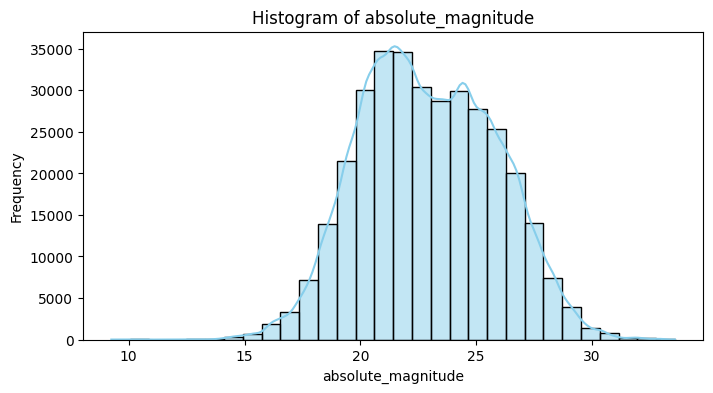

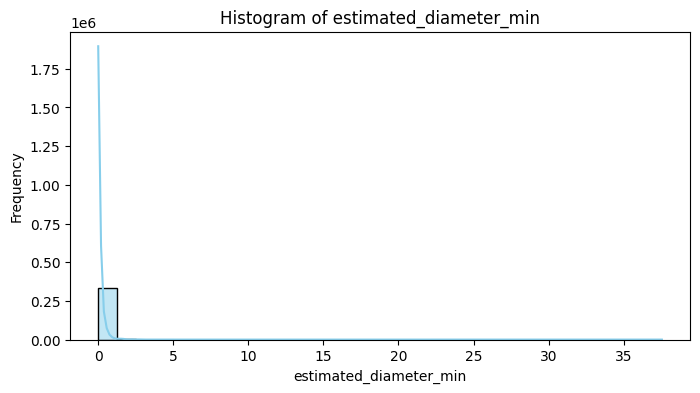

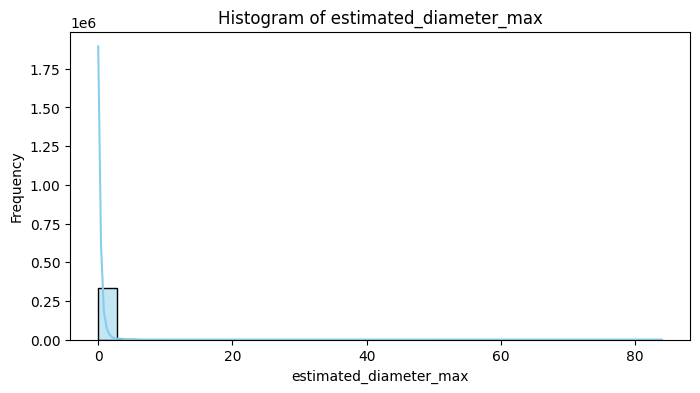

In [ ]:
col_null=df.columns[df.isnull().any()]

for column in col_null:
    if df[column].dtype in ["int64", 'float64']:
        plt.figure(figsize=(8,4))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

checking the skewness for each column which having null values

In [ ]:
for column in col_null:
    if df[column].dtype in ["int64",'float64']:
        skew_value=skew(df[column].dropna())
        print(f"Skewness for {column}: {skew_value:.2f}")

Skewness for absolute_magnitude: 0.08
Skewness for estimated_diameter_min: 30.96
Skewness for estimated_diameter_max: 30.96


Applying cube transformation for decreasing the skewness

Skewness after cube root transformation:
Estimated Diameter Min: 1.11
Estimated Diameter Max: 1.11


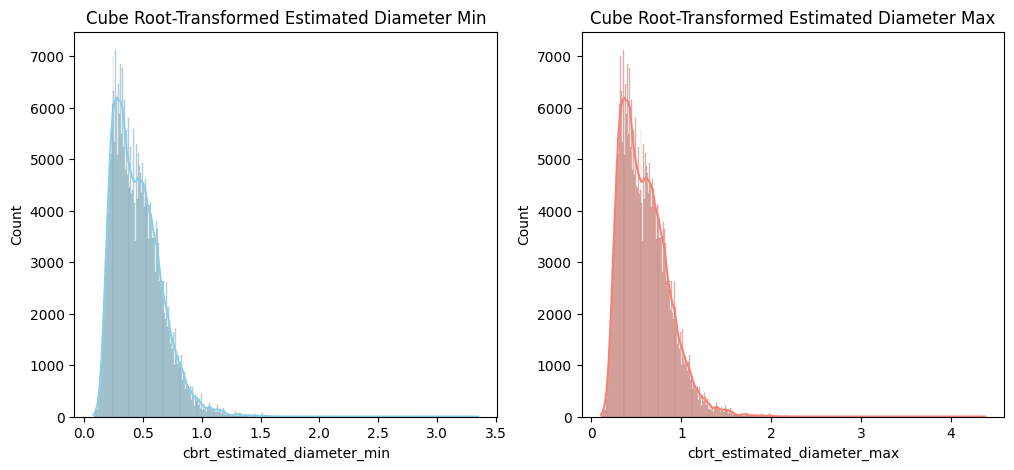

In [ ]:
# Apply cube root transformation
df['cbrt_estimated_diameter_min'] = np.cbrt(df['estimated_diameter_min'])
df['cbrt_estimated_diameter_max'] = np.cbrt(df['estimated_diameter_max'])

# Check skewness after cube root transformation
print("Skewness after cube root transformation:")
print(f"Estimated Diameter Min: {skew(df['cbrt_estimated_diameter_min'].dropna()):.2f}")
print(f"Estimated Diameter Max: {skew(df['cbrt_estimated_diameter_max'].dropna()):.2f}")

# Plot histograms after cube root transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['cbrt_estimated_diameter_min'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Cube Root-Transformed Estimated Diameter Min")
sns.histplot(df['cbrt_estimated_diameter_max'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Cube Root-Transformed Estimated Diameter Max")
plt.show()

Modifying the data frame with the updated dataframes

In [ ]:
df['estimated_diameter_min'] = df['cbrt_estimated_diameter_min']
df['estimated_diameter_max'] = df['cbrt_estimated_diameter_max']

Filling mean based on linear distribution

In [ ]:
df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)

<ipython-input-65-dc16e8972fe8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)


Filling median based on skewness which is near to 1

In [ ]:
# Example: Filling missing values using median
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].median(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].median(), inplace=True)

<ipython-input-66-eb052409ccac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].median(), inplace=True)
<ipython-input-66-eb052409ccac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

Checking the skewness after filling the null values

In [ ]:
# Rechecking skewness after imputation
skew_min = df['estimated_diameter_min'].skew()
skew_max = df['estimated_diameter_max'].skew()
print("Skewness after imputation:")
print(f"Estimated Diameter Min: {skew_min}")
print(f"Estimated Diameter Max: {skew_max}")

Skewness after imputation:
Estimated Diameter Min: 1.105179368883836
Estimated Diameter Max: 1.1051793689449556


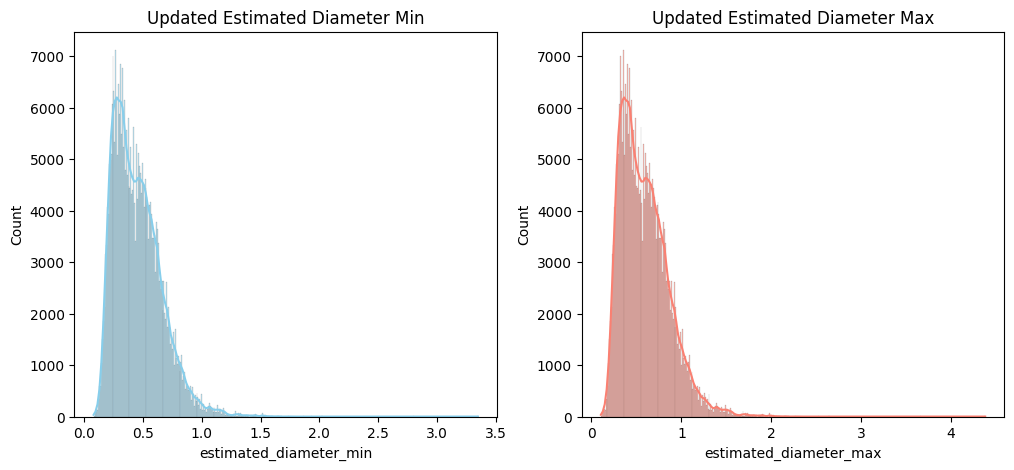

In [ ]:
# Plot histograms for updated columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['estimated_diameter_min'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Updated Estimated Diameter Min")

sns.histplot(df['estimated_diameter_max'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Updated Estimated Diameter Max")

plt.show()

Converting category data type to int
Filling the dummy vales for orbiting body

In [ ]:
df['is_hazardous'] = df['is_hazardous'].astype(int)
df = pd.get_dummies(df, columns=['orbiting_body'], drop_first=True)

In [ ]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05,338199.000000,338171.000000,338171.000000
mean,1.759939e+07,22.932525,0.452065,0.591147,51060.662908,4.153535e+07,0.127623,0.452068,0.591151
std,2.287225e+07,2.911096,0.203418,0.266001,26399.238435,2.077399e+07,0.333670,0.203426,0.266012
min,2.000433e+06,9.250000,0.079956,0.104555,203.346433,6.745533e+03,0.000000,0.079956,0.104555
25%,3.373980e+06,20.740000,0.293890,0.384309,30712.031471,2.494540e+07,0.000000,0.293890,0.384309
50%,3.742127e+06,22.800000,0.418329,0.547033,47560.465474,4.332674e+07,0.000000,0.418329,0.547033
75%,5.405374e+07,25.100000,0.573920,0.750493,66673.820614,5.933961e+07,0.000000,0.573920,0.750493
max,5.446281e+07,33.580000,3.348510,4.378715,291781.106613,7.479865e+07,1.000000,3.348510,4.378715


In [ ]:
# Create a new feature 'risk_factor' by combining 'velocity' and 'size'
df['risk_factor'] = df['relative_velocity'] / df['miss_distance']


In [ ]:
df.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max,risk_factor
0,2162117,162117 (1998 SD15),19.14,0.733700,0.959430,71745.401048,5.814362e+07,0,0.733700,0.959430,0.001234
1,2349507,349507 (2008 QY),18.50,0.809441,1.058474,109949.757148,5.580105e+07,1,0.809441,1.058474,0.001970
2,2455415,455415 (2003 GA),21.45,0.514658,0.672997,24865.506798,6.720689e+07,0,0.514658,0.672997,0.000370
3,3132126,(2002 PB),20.63,0.583694,0.763273,78890.076805,3.039644e+07,0,0.583694,0.763273,0.002595
4,3557844,(2011 DW),22.70,0.424800,0.555495,56036.519484,6.311863e+07,0,0.424800,0.555495,0.000888


In [ ]:
# Display data types of all columns
print(df.dtypes)


neo_id                           int64
name                            object
absolute_magnitude             float64
estimated_diameter_min         float64
estimated_diameter_max         float64
relative_velocity              float64
miss_distance                  float64
is_hazardous                     int64
cbrt_estimated_diameter_min    float64
cbrt_estimated_diameter_max    float64
risk_factor                    float64
dtype: object


In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max,risk_factor
0,2162117,162117 (1998 SD15),19.14,0.733700,0.959430,71745.401048,5.814362e+07,0,0.733700,0.959430,0.001234
1,2349507,349507 (2008 QY),18.50,0.809441,1.058474,109949.757148,5.580105e+07,1,0.809441,1.058474,0.001970
2,2455415,455415 (2003 GA),21.45,0.514658,0.672997,24865.506798,6.720689e+07,0,0.514658,0.672997,0.000370
3,3132126,(2002 PB),20.63,0.583694,0.763273,78890.076805,3.039644e+07,0,0.583694,0.763273,0.002595
4,3557844,(2011 DW),22.70,0.424800,0.555495,56036.519484,6.311863e+07,0,0.424800,0.555495,0.000888


# sai kiran eda

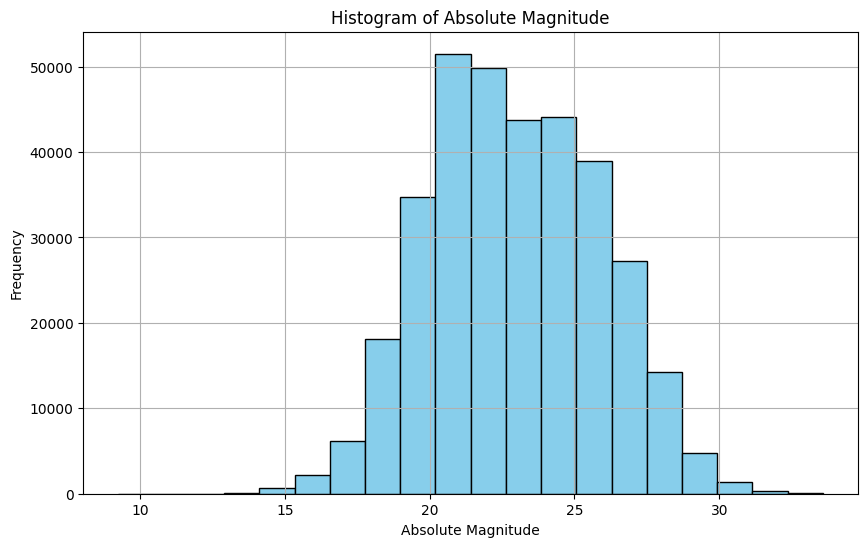

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['absolute_magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# This graph shows the distribution of the intrinsic brightness of the nearest Earth objects (NEOs). Most of the objects have an absolute magnitude in the range of approximately 18 to 22, indicating their brightness.

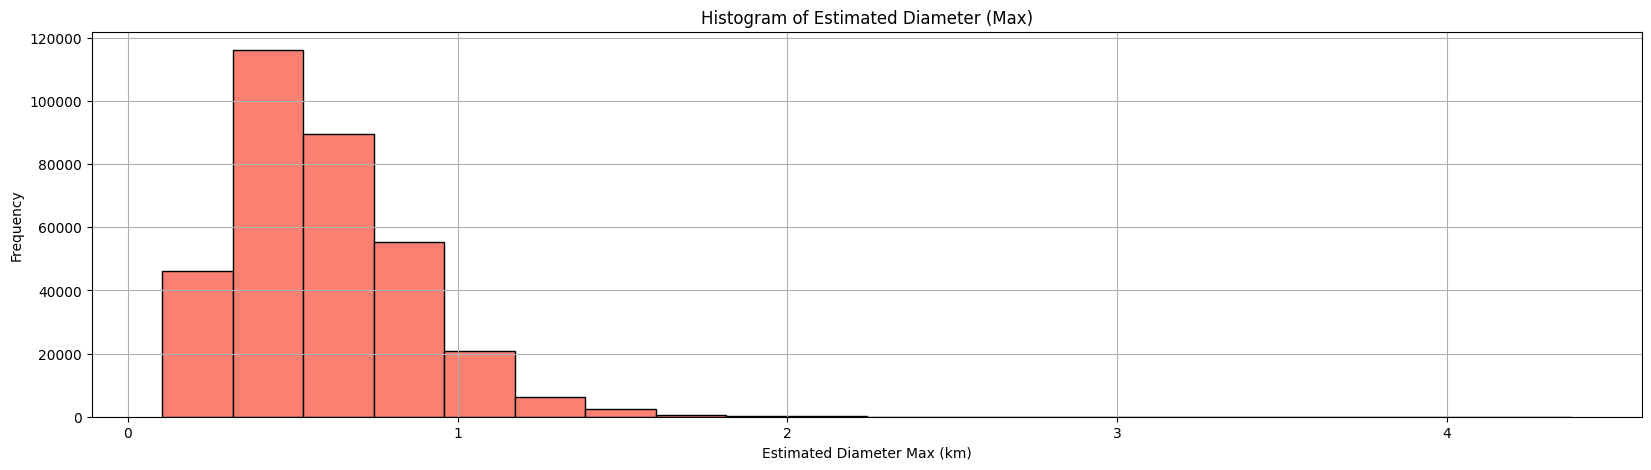

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df['estimated_diameter_max'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Estimated Diameter (Max)')
plt.xlabel('Estimated Diameter Max (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# This graph displays the size distribution of the objects. The majority of the NEOs have a maximum estimated diameter of less than 1 km, with a few objects larger than that.

# ramakanth eda

<ipython-input-78-81c43c9493f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_hazardous', data=df, palette='Set1')


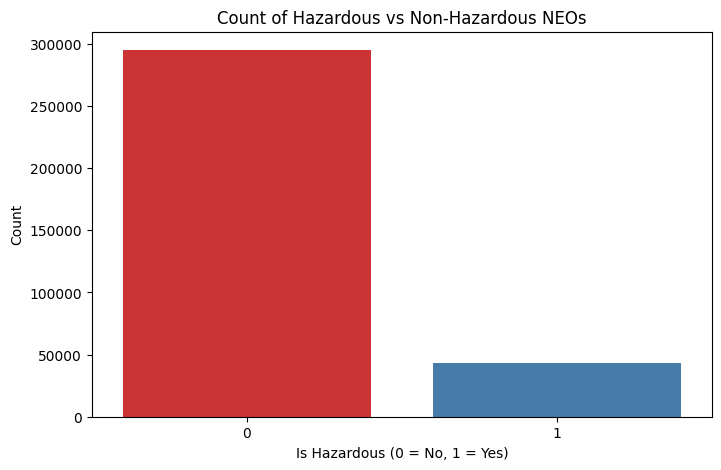

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_hazardous', data=df, palette='Set1')
plt.title('Count of Hazardous vs Non-Hazardous NEOs')
plt.xlabel('Is Hazardous (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# shruthi eda

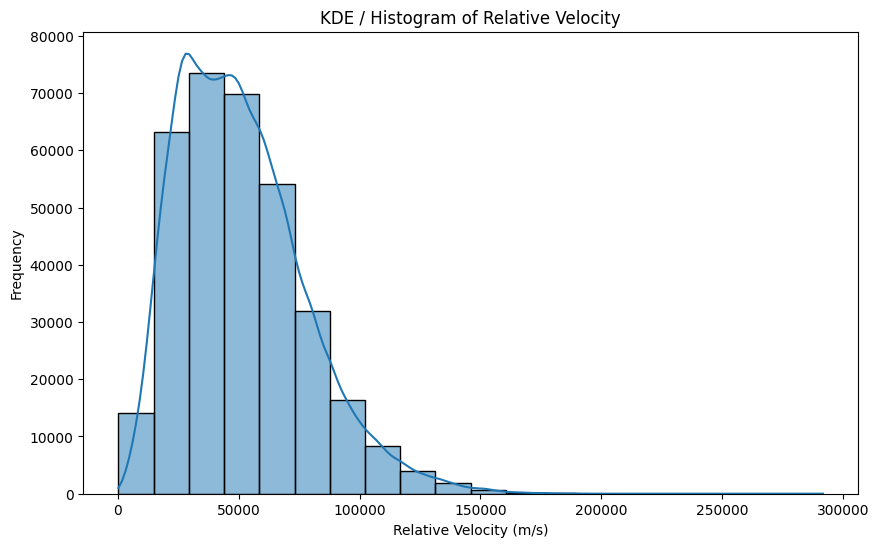

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='relative_velocity', kde=True, bins=20)
plt.title('KDE / Histogram of Relative Velocity')
plt.xlabel('Relative Velocity (m/s)')
plt.ylabel('Frequency')
plt.show()

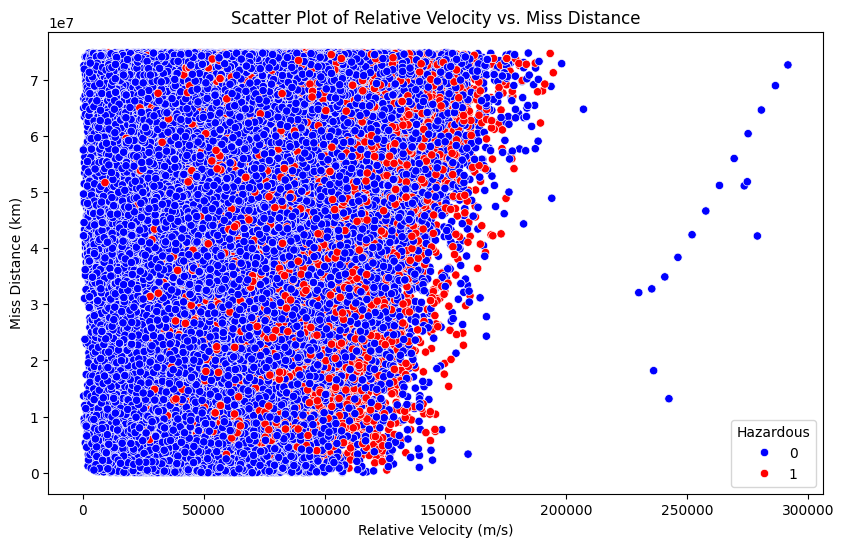

In [ ]:
# Plot 2: Scatter Plot of Relative Velocity vs. Miss Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='relative_velocity', y='miss_distance', hue='is_hazardous', palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot of Relative Velocity vs. Miss Distance')
plt.xlabel('Relative Velocity (m/s)')
plt.ylabel('Miss Distance (km)')
plt.legend(title="Hazardous")
plt.show()


# Lokesh eda

The below scatter plot depicts the relationship between estimated_diameter_max and absolute_magnitude is shown, revealing an inverse trend. Larger diameters are associated with lower absolute magnitudes, indicating that bigger objects tend to be brighter. This plot suggests a strong, nonlinear correlation between the size of the objects and their brightness.

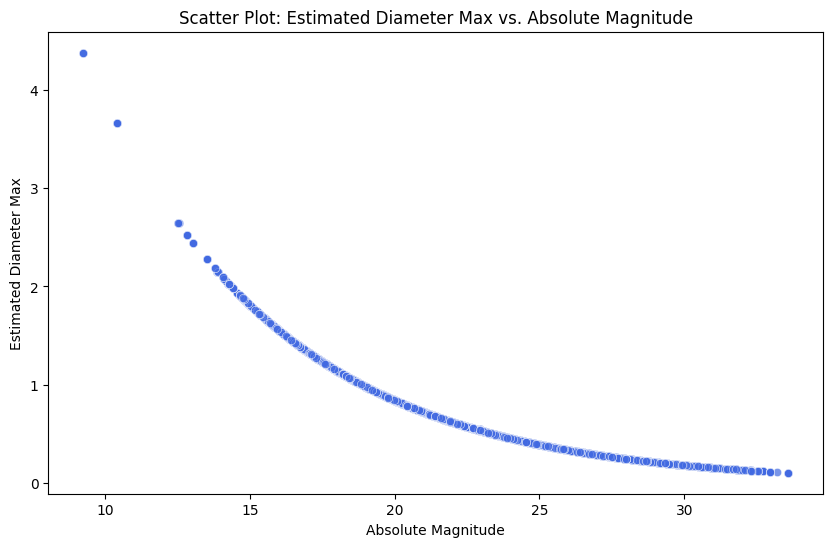

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='absolute_magnitude', y='estimated_diameter_max', color='royalblue', alpha=0.7)
plt.title("Scatter Plot: Estimated Diameter Max vs. Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Estimated Diameter Max")
plt.show()

The below violin plot provides a visual comparison of the miss_distance distribution between hazardous and non-hazardous objects. Both groups exhibit a similar shape in distribution, with only slight differences in their medians, potentially indicating a minor variation in average miss distances. The density patterns within the violins reflect the spread and range of distances, without any major asymmetries between the groups.

<ipython-input-82-4272ac02adb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_hazardous', y='miss_distance', palette='Set2')


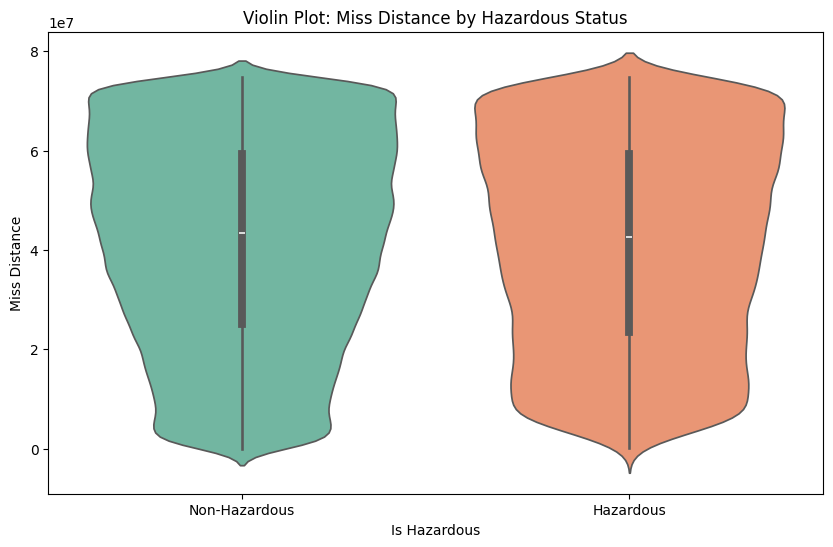

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='is_hazardous', y='miss_distance', palette='Set2')
plt.title("Violin Plot: Miss Distance by Hazardous Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Miss Distance")
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.show()

In [88]:
hazardous = df[df['is_hazardous'] == 1]['miss_distance']
non_hazardous = df[df['is_hazardous'] == 0]['miss_distance']

t_stat, p_value = ttest_ind(hazardous, non_hazardous)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -3.8032779676307853, P-value: 0.00014281905134896032


The independent t-test analyzes the miss_distance for hazardous and non-hazardous objects, assessing if there’s a meaningful difference between the two. The T-statistic represents the difference's size, and the p-value indicates whether this difference is due to chance. A p-value below 0.05 would confirm a statistically significant difference in miss distances between hazardous and non-hazardous objects.

# Nirvika's Eda

<ipython-input-84-7286835d2b6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_hazardous', y='relative_velocity', data=df, palette='viridis')


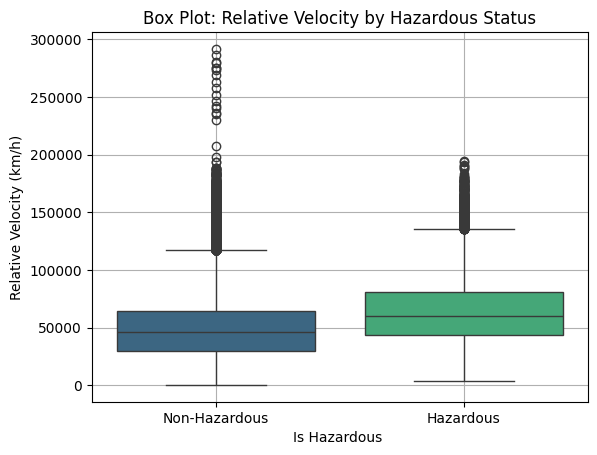

In [ ]:
sns.boxplot(x='is_hazardous', y='relative_velocity', data=df, palette='viridis')

plt.xlabel('Is Hazardous ')
plt.ylabel('Relative Velocity (km/h)')
plt.title('Box Plot: Relative Velocity by Hazardous Status')
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.grid(True)
plt.show()

#The box plot shows that hazardous Near-Earth Objects (NEOs) have a higher median relative velocity compared to
#non-hazardous ones, indicating a greater risk of impact. Also, the wider variability in velocities for hazardous
#NEOs suggests that some travel significantly faster

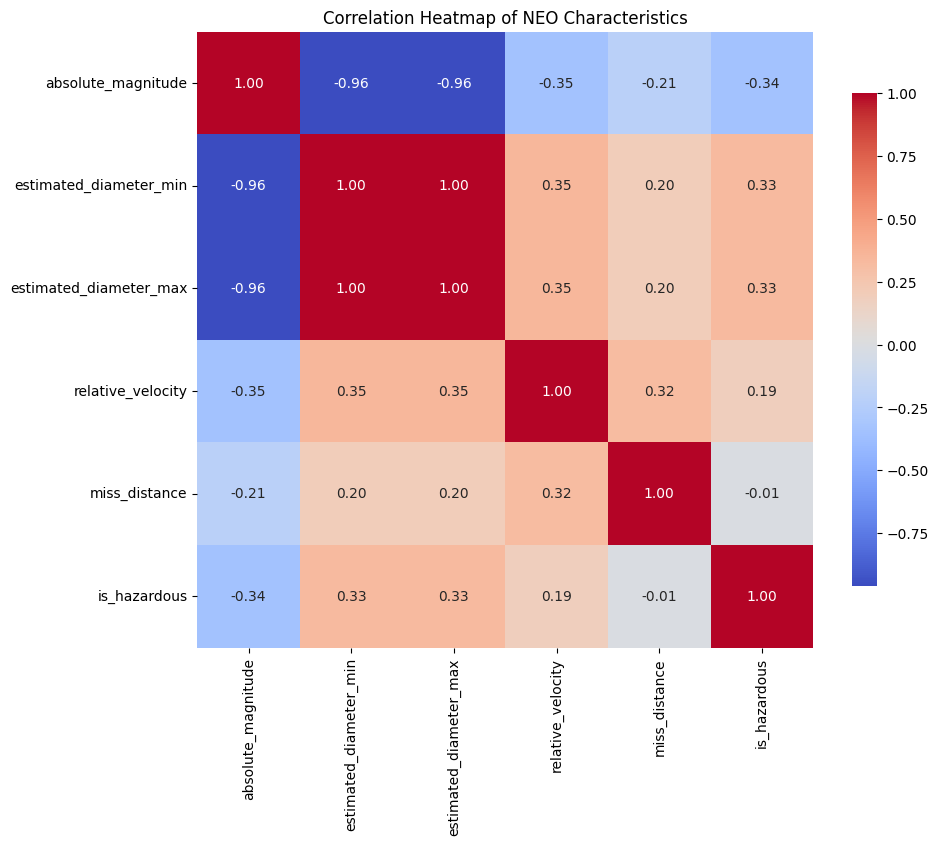

In [ ]:
correlation_matrix = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of NEO Characteristics')
plt.show()

# 1. There is a moderate positive correlation between relative_velocity and miss_distance (0.31)
#    This indicates that NEOs with higher relative velocities are likely to have greater miss distances
#    from Earth, which may imply a relationship between the speed of the NEO and how far it passes from our planet.

# 2. There are strong negative correlations between absolute_magnitude and both estimated_diameter_min and
#    estimated_diameter_max (-0.59), indicating that as absolute magnitude increases, the estimated diameters decrease,
#    that means larger magnitudes correspond to smaller sizes.
